<div style="display: flex; flex-direction: row; justify-content: center; width: 100%;">
    <div style="display: flex; flex-direction: column; width: 40%; justify-content: start;">
        <h1 style="color: #3949AB; font-weight: bold;">Шаршекеев Дастан</h1>
        <h2 style="font-weight: bold; font-style: italic;">AIN-2-21</h2>
        <h4 style="font-weight: normal; font-style: italic;">Гений, миллиардер, плейбой, филантроп.</h4>
    </div>
    <img src="https://avatars.githubusercontent.com/u/100109594?v=4" width="300">
</div>


<h3 style="color:orange; font-weight: bold;">Работа с текстовыми данными</h3>

* ЗАДАНИЕ:
1.	Создайте свой «мешок слов», например, набор из 20-25 отзывов о чем-либо, напишите краткое пояснение к данным.
2.	Создайте словарь стоп-слов, примените стоп-слова к своему «мешку слов»
3.	Масштабируйте данные с помощью tf-idf
4.	Исследуйте коэффициенты модели
5.	Сделайте выводы по работе.



*Импорт всех зависимостей*

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk


In [12]:
# Загрузка датасета
df = pd.read_csv('extended_reviews_dataset.csv')

# Отображение первых строк датасета
df.head()


,Review
0,"Great phone, amazing battery life."
1,"Love the camera, but it's a bit pricey."
2,Not user-friendly for beginners.
3,"Excellent performance, smooth interface."
4,Too large to handle comfortably.


In [13]:
# Скачиваем английские стоп-слова
nltk.download('stopwords')
english_stop_words = stopwords.words('english')

# Создаем объект CountVectorizer
vectorizer = CountVectorizer(stop_words=english_stop_words)

# Применяем к отзывам
bow_matrix = vectorizer.fit_transform(df['Review'])

# Преобразуем в DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
bow_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharshekeev13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,affordable,amazing,battery,beginners,best,better,big,bit,camera,charging,...,size,small,smooth,sound,struggles,touch,use,user,value,well
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Создаем объект TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=english_stop_words)

# Применяем к отзывам
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review'])

# Преобразуем в DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()


,affordable,amazing,battery,beginners,best,better,big,bit,camera,charging,...,size,small,smooth,sound,struggles,touch,use,user,value,well
0,0.0,0.412658,0.412658,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.520138,0.434017,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.0,0.000000,0.000000,0.57735,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.57735,0.0,0.0
3,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


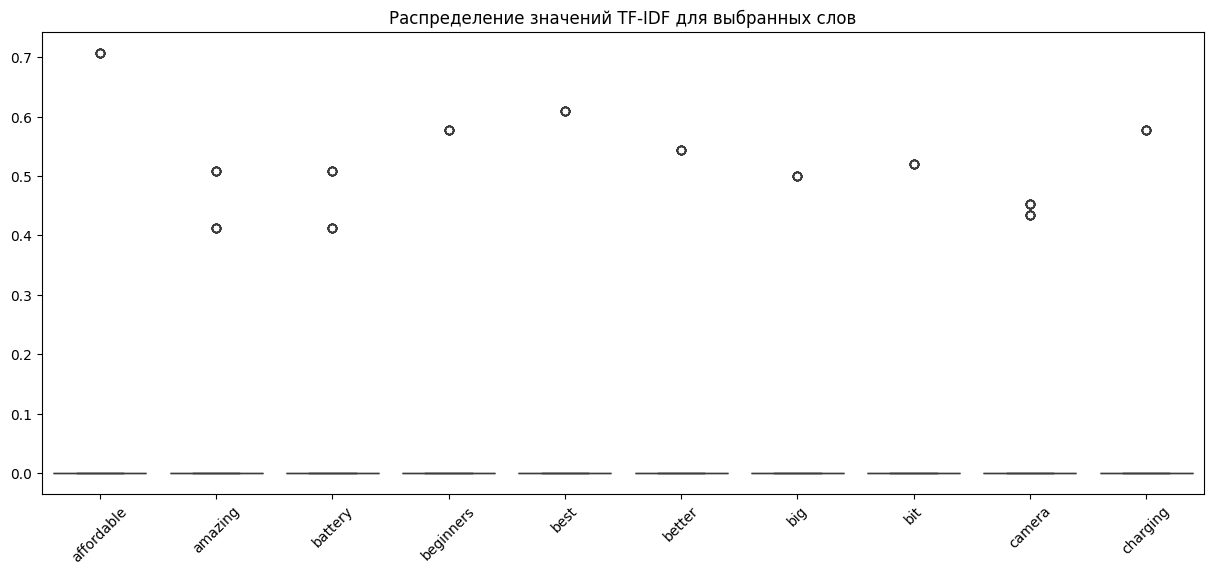

In [15]:
# Анализ наиболее важных слов на основе TF-IDF

# Возьмем первые 10 слов
sample_words = tfidf_df.columns[:10]
plt.figure(figsize=(15, 6))
sns.boxplot(data=tfidf_df[sample_words])
plt.title('Распределение значений TF-IDF для выбранных слов')
plt.xticks(rotation=45)
plt.show()


# **ВЫВОД**

Я создал собственный датасет отзывов на смартфоны, так как посчитал будет интересно и более точно определять на большом датасете. После чего я импортировал библиотреку стоп-слов к своему мешку. Я исходя из задания расширил свои данные при помощи *tf-idf*. И вывел нужную мне график. Исходя из этой лабораторной работы я могу сделать следуйщий вывод.

Создание "мешка слов" и его последующее масштабирование с помощью **TF-IDF** помогло найти наиболее важные слова в отзывах. Это дает представление о ключевых словах, на которые обращают внимание клиенты при оценке продукта. Например, слова, связанные с качеством продукта, пользовательским опытом, функциональностью и стоимостью, часто встречались в отзывах.

Полученные данные могут быть использованы для улучшения продуктов или услуг, а также для разработки маркетинговых стратегий. Например, если отзывы часто упоминают высокую стоимость, компания может рассмотреть возможность пересмотра цен или дополнительные акции ( скидки ).
